# MAC0317/MAC5920
## Introdução ao Processamento de Sinais Digitais
### Seção 1.3: Sinais e imagens

In [1]:
# Inclui  os módulos utilizados
import math as m
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Audio
from ipywidgets import Dropdown, Label, FloatSlider, IntSlider, Layout, ToggleButton, ToggleButtons, interactive, VBox, HBox, AppLayout

## Sinais unidimensionais
> - são modelados como funções $x(\cdot)$ de uma variável real $t\in[a,b]$ (que costuma representar o *tempo*)
> - $x(t)\in\mathbb{R}$ pode representar pressão (sonora), corrente/potencial elétric@, velocidade de um objeto, temperatura, etc. 

### Exemplo (Figura 1.1 - Versão interativa): Um sinal analógico com duas componentes senoidais

Considere a função do exemplo da página 4

$$ x(t) = a_1\sin(w_1t)+a_2\sin(w_2t), $$
para $t\in[0,4\pi]$, com $a_1=0.75$, $w_1=3$, $a_2=0.5$ e $w_2=7$.

In [2]:
#cria os sliders para os parametros
a1 = FloatSlider(min=0, max=1, step=.05, value=0.75, continuous_update=False, description=r'$a_1$')
a2 = FloatSlider(min=0, max=1, step=.05, value=0.5, continuous_update=False, description=r'$a_2$')
w1 = FloatSlider(min=1, max=15, step=.1, value=3, continuous_update=False, description=r'$w_1$')
w2 = FloatSlider(min=1, max=15, step=.1, value=7, continuous_update=False, description=r'$w_2$')

# Função que plota o sinal 
def plt_signal(a1, w1, a2, w2):
    # Cria um domínio temporal entre 0 e 4$\pi$ com 800 amostras/segundo
    # (esta é uma amostragem arbitrária, mas que permite plotar/visualizar a função "como se fosse contínua")
    t = np.arange(0,4 * m.pi, 1/800)
    # Cria o sinal x(t) com base nos coeficientes
    x = a1 * np.sin(w1 * t) + a2 * np.sin(w2 * t)
    # Mostra o gráfico da função;
    # o '.' impede os pontos adjacentes de serem conectados por segmentos de reta;
    # markersize (ou ms) regula a largura da linha.
    plt.figure(figsize=(15,5))
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    plt.plot(t, x, '.', markersize=1)
    plt.xlim([0, max(t)])
    plt.title(r'Sinal $x(t) =  {}\sin({}t)+{}\sin({}t)$'.format(a1, w1, a2, w2), fontdict = {'fontsize' : 14})
    plt.ylabel('amplitude')
    plt.xlabel('tempo (s)')
    
    plt.show()

In [3]:
# Cria o ambiente interativo
w = interactive(plt_signal, a1=a1, w1=w1, a2=a2, w2=w2)
display(VBox([
            w.children[4],
            HBox([
                VBox(w.children[0:2]),
                VBox(w.children[2:4])],
                layout=Layout(justify_content='center'))
             ]))
w.update()

### Amostragem temporal

> - passagem do domínio contínuo ($t\in[a,b]$) para um domínio discreto ($n=0,1,\ldots,N$)
> - parametrizada pelo intervalo de amostragem $\left(\Delta_t=\frac{b-a}{N}\right)$ ou, equivalentemente, pela taxa de amostragem $\left(SR=\frac{N}{b-a}\right)$

> $$x_n = x(a+n\Delta_t) = x\left(a+\frac{n}{SR}\right)$$

> - a amostragem produz um vetor $\begin{array}{l}x=(x_0,x_1,\ldots,x_N)\in\mathbb{R}^{N+1}\end{array}.$

In [4]:
N = IntSlider(min=1, max=400, step=1, value=100, continuous_update=False, layout=Layout(width='95%'))
analog = ToggleButton(value=False, description='Mostrar Sinal original', icon='check', layout=Layout(width='300px'))

def plt_sampled_signal(N, analog):
    # Cria o sinal x(t) com base nos coeficientes
    t = np.arange(0,4 * m.pi, 1/800)
    x = 0.75 * np.sin(3 * t) + 0.5 * np.sin(7 * t)
    # Cria o sinal Amostrado com N amostras,
    xs = [x[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
    #Cria o gráfico do sinal
    plt.figure(figsize=(15,4))
    plt.title(r'Sinal $x(t) =  0.75\sin(3t)+0.5\sin(7t)$ amostrado com N={} pontos'.format(N),
              fontdict = {'fontsize' : 14})
    plt.ylabel('amplitude')
    plt.xlabel('tempo (s)')
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    plt.xlim([0, max(t)])
    if analog:
        plt.plot(t, x, markersize=1, label='Sinal "analógico"')    
    plt.plot(t,xs,'.',ms=7, label='Sinal amostrado', color='orange')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [5]:

# Cria o ambiente interativo
w = interactive(plt_sampled_signal, N=N, analog=analog)
display(VBox([w.children[2], w.children[0], w.children[1]], layout=Layout(align_items='center')))
w.update()

### Quantização

> - discretização dos valores de amplitude $x(t)\in[-M,M]$ em valores $x_q(t)$ usando $B$ bits
> - processo análogo ao *arredondamento* a valores inteiros
> - divisão do âmbito $[-M,M]$ em $2^B$ faixas
> - na **quantização linear** as faixas têm largura constante $\frac{2M}{2^B}$
> - o **erro de quantização** é o sinal $e(t) = x_q(t)-x(t)$

### Quantização

**Alternativa à Fig. 1.2:** sinal amostrado com N=100 e com quantização variando de 2 a 8 bits (4 a 256 valores)

In [6]:
analog = ToggleButton(value=False, description='Mostrar Sinal original', layout=Layout(width='auto'))
error = ToggleButton(value=False, description='Mostrar Erro de Quantização', layout=Layout(width='auto'))
bits = ToggleButtons(value=4, options=[2, 4, 6, 8], description='Profundidade de Bits',
                     layout=Layout(justify_content='center'), style={'description_width': 'initial'})

def pltsubsampledsignal(analog, error, bits):
    N = 100
    t = np.arange(0,4 * m.pi, 1/800)
    x = 0.75 * np.sin(3 * t) + 0.5 * np.sin(7 * t)
    xs = [x[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
    # Normaliza o sinal amostrado entre 0 e 1-ε
    lb = min(x)
    ub = max(x)
    xsnorm = (1-np.finfo(float).eps)*(x - lb) / (ub - lb)
    # Quantiza usando 2^bits valores [0...2^(bits-1)]
    steps = 2 ** bits
    xqnorm = np.floor(steps * xsnorm)
    # Coloca de volta na faixa de valores originais [lb...ub],
    # usando como codewords os valores médios das 2^bits faixas entre lb e ub
    xq = (ub - lb) * xqnorm / steps + lb + 0.5 * (ub - lb) / steps
    # Amostra o sinal quantizado com N amostras
    xqs = [xq[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
    # Gera o gráfico
    plt.figure(figsize=(15,4))
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    if analog:
        plt.plot(t, x, label='Sinal original "contínuo"', color='blue')
        plt.plot(t, xs, '.', ms=7, label='Sinal original amostrado', color='blue')
    if error:
        e = xq-x
        es = [e[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
        plt.plot(t, e, '-', ms=5, label='Erro de quantização', color='green')
        plt.plot(t, es, '.', ms=7, label='Erro de quantização', color='green')
    plt.plot(t, xq, '-', ms=5, label='Sinal "analógico" quantizado', color='orange')
    plt.plot(t, xqs, '.', ms=7, label='Sinal discreto quantizado', color='orange')
    plt.ylim([-1.5,1.5])
    plt.xlim([0, max(t)])
    plt.title(r'Sinal $x(t) =  0.75\sin(3t)+0.5\sin(7t)$ quantizado com {} bits'.format(bits),
              fontdict = {'fontsize' : 14})
    plt.ylabel('amplitude')
    plt.xlabel('tempo (s)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [7]:
w = interactive(pltsubsampledsignal, N=N,error=error, analog=analog, bits=bits)
display(VBox([w.children[3], w.children[2], HBox(w.children[0:2],
                                                 layout=Layout(justify_content='space-around', margin='10px'))]))

w.update()

### Figura 1.3: acréscimo de ruído aditivo

$$y_n = x_n+\varepsilon_n$$ 

In [8]:
analog = ToggleButton(True, description='Mostrar Sinal original', layout=Layout(width='auto'))
noise = ToggleButton(False, description='Mostrar ruído', layout=Layout(width='auto'))
a = FloatSlider(0.5, min=0, max=1, continuous_update=False, description='nível de ruído',
                style={'description_width': 'initial'})

def pltsubsampledsignal(analog, a, noise):
    N = 100
    t = np.arange(0,4 * m.pi, 1/800)
    x = 0.75 * np.sin(3 * t) + 0.5 * np.sin(7 * t)
    # Cria o ruído aleatório e soma ao sinal
    ruido = a*(np.random.rand(len(x))-0.5)
    xr = x + ruido
    # Amostra o sinal quantizado com N amostras
    xrs = [xr[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
    # Gera o gráfico
    plt.figure(figsize=(15,4))
    plt.axhline(y=0.0, color='gray', linestyle='--', ms=1)
    if analog:
        plt.plot(t, x, label='Sinal "analógico"')
    if noise:
        ruidos = [ruido[i] if i % int(len(x)/N + 1)== 0 else None for i in range(len(x))]
        # plt.plot(t, ruido, '-', ms=1, label='Sinal ruidoso', color='green', alpha=0.5)
        plt.plot(t, ruidos, '.', ms=5, label='Sinal ruidoso amostrado', color='green')
    plt.plot(t, xrs, '*', ms=5, label='Sinal amostrado', color='orange')
    plt.ylim([-1.5,1.5])
    plt.xlim([0, max(t)])
    plt.title(r'Sinal $x(t) =  0.75\sin(3t)+0.5\sin(7t)$ amostrado com N=100 pontos, com ruído',
              fontdict = {'fontsize' : 14})
    plt.ylabel('amplitude')
    plt.xlabel('tempo (s)')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

In [9]:
w = interactive(pltsubsampledsignal, noise=noise, analog=analog, a=a)
display(VBox([w.children[3], HBox(w.children[0:3], layout=Layout(justify_content='space-around', width='850px'))]))
w.update()

**Exemplo adicional:** transpõe o sinal para a faixa audível e toca
- gera D=2.5 segundos de sinal a 8000 amostras/segundo
- multiplica as frequências por F=1000 para cairem na faixa audível.

 As frequências originais eram
 $\frac{3}{2\pi} = 0.477\ \mbox{Hz}$
 e 
 $\frac{7}{2\pi} = 1.114\ \mbox{Hz},$
 assim as novas serão $477$ Hz e $1114$ Hz.
 
 As amplitudes serão reduzidas para garantir que o resultado esteja sempre na faixa $[-1,+1]$ e assim evitar distorções.

__Exemplo adicional:__ Versão audível com quantização

In [10]:
a1 = FloatSlider(0.25, min=0, max=0.3, step=.01, continuous_update=False, description=r'$a_1$')
a2 = FloatSlider(0.167, min=0, max=0.3, step=.01, continuous_update=False, description=r'$a_2$')
w1 = FloatSlider(477, min=300, max=3000, step=1, continuous_update=False, description=r'$w_1$')
w2 = FloatSlider(1114, min=300, max=3000, step=1, continuous_update=False, description=r'$w_2$')
# não normalizado
def play_signal(a1, w1, a2, w2):
    T = np.arange(0,2.5 ,1/8000)
    X = a1 * np.sin(w1 * 2 * m.pi * T) + a2 * np.sin(w2 *2 * m.pi * T)
    display(Audio(X, rate=8000))

In [11]:
orig = interactive(play_signal, a1=a1, w1=w1, a2=a2, w2=w2) 
orig.update()
AppLayout(
    header=HBox([Label(r'$\large{x(t) = a_1 \sin(w_1 2\pi t) + a_2 \sin(w_2 2 \pi t)}$', style={'color': 'red'})], layout=Layout(justify_content='center')),
    center=HBox([orig.children[-1]], layout=Layout(justify_content='center')),
    footer=HBox([VBox([a1, w1]), VBox([a2, w2])], layout=Layout(justify_content='center')),
    pane_heights=[10, 20, 20]
)

AppLayout(children=(HBox(children=(Label(value='$\\large{x(t) = a_1 \\sin(w_1 2\\pi t) + a_2 \\sin(w_2 2 \\pi …

In [12]:
b = ToggleButtons(value=4, options=[2, 4, 6, 8, 10], description='Profundidade de Bits',
                  layout=Layout(justify_content='center'), style={'description_width': 'initial'})
# Não normalizado
T = np.arange(0, 2.5, 1 / 8000)
X = 0.25 * np.sin(477 * 2 * m.pi * T) + 0.167 * np.sin(1114 * 2 * m.pi * T)
ub, lb = min(X), max(X)    
XNORM = (X - lb)/(ub - lb)
def play_quantized(bits):
    steps = 2 ** bits
    # Quantiza
    XQNORM = np.floor(steps * XNORM)
    XQ = (ub - lb) * XQNORM / steps + lb + 0.5 * (ub - lb) / steps
    display(Audio(XQ, rate=8000, normalize=False))
    
    
def play_quant_error(bits):
    steps = 2 ** bits
    # Quantiza
    XQNORM = np.floor(steps * XNORM)
    XQ = (ub - lb) * XQNORM / steps + lb + 0.5 * (ub - lb) / steps
    display(Audio(XQ-X, rate=8000, normalize=False))

In [13]:
quant, error = interactive(play_quantized, bits=b), interactive(play_quant_error, bits=b)
quant.update(), error.update()
AppLayout(
    header=HBox([Label(r'$\large{x(t) = 0.25 \sin(477 \times 2\pi t) + 0.167 \sin(1114 \times 2\pi t)}$')],
                layout=Layout(justify_content='center')),
    left_sidebar=VBox([Label('Audio quantizado'), quant.children[-1]], layout=Layout(align_items='center')),
    right_sidebar=VBox([Label('Erro de quantização'), error.children[-1]], layout=Layout(align_items='center')),
    footer=b
)

AppLayout(children=(HBox(children=(Label(value='$\\large{x(t) = 0.25 \\sin(477 \\times 2\\pi t) + 0.167 \\sin(…

In [14]:
level = FloatSlider(0.3, min=0, max=0.7, step=.01, continuous_update=False, description='amplitude do ruído',
                style={'description_width': 'initial'})
def play_noise(a):
    global R
    T = np.arange(0, 2.5, 1 / 8000)
    X = 0.25 * np.sin(477 * 2 * m.pi * T) + 0.167 * np.sin(1114 * 2 * m.pi * T)
    R = a * (2 * np.random.rand(len(T)) - 1)
    # toca sinal + ruído
    display(Audio(X + a * R, rate=8000, normalize=False))

def play_noise_only(a):
    # toca apenas ruído
    R = a * (2 * np.random.rand(len(T))- 1)
    display(Audio(a * R, rate=8000, normalize=False))

In [15]:
noise, noise_only = interactive(play_noise, a=level), interactive(play_noise_only, a=level) 
noise.update(), noise_only.update()
AppLayout(
    header=HBox([Label(r'$\large{x(t) = 0.25 \sin(477 \times 2\pi t) + 0.167 \sin(1114 \times 2\pi t)}$')],
                layout=Layout(justify_content='center')),
    left_sidebar=VBox([Label('Audio com ruído adicionado'), noise.children[-1]], layout=Layout(align_items='center')),
    right_sidebar=VBox([Label('Somente ruído'), noise_only.children[-1]], layout=Layout(align_items='center')),
    footer=HBox([level], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(Label(value='$\\large{x(t) = 0.25 \\sin(477 \\times 2\\pi t) + 0.167 \\sin(…

## Sinais bidimensionais / imagens
> - modelados como funções de duas variáveis reais $(x,y)\in[a,b]\times[c,d]$ (costumam representar o *espaço*)
> - $f(x,y)\in\mathbb{R}$ pode representar luminosidade, cor, temperatura, densidade, etc.

### Figura 1.4: Uma imagem com 4 componentes senoidais

$$\begin{array}{rcl}
f(x,y)&=&1.5\cos(2x)\cos(7y)+ 0.75\cos(5x)\sin(3y)\\
&&-1.3\sin(9x)cos(15y)+1.1\sin(13x)sin(11y)
\end{array}$$

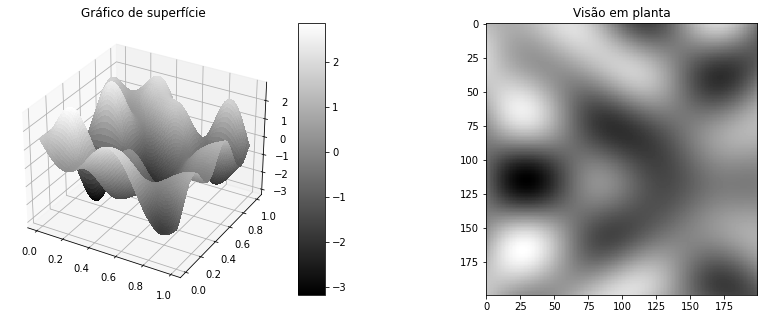

In [16]:
# Define um domínio espacial com 200x200 pontos no retângulo [0,1[x]0,1].
# Lembre-se que os índices crescentes da matriz refletem valores descrescentes do eixo vertical
density = 200;x = np.arange(0, 1, 1 / density);y = np.arange(1, 0, -1 / density);x, y = np.meshgrid(x, y)
f = 1.5 * np.cos(7 * y) * np.cos(2 * x) + 0.75 * np.sin(3 * y) * np.cos(5 * x) \
   -1.3 * np.cos(15 * y) * np.sin(9 * x) + 1.1 * np.sin(11 * y) * np.sin(13 * x)
fig = plt.figure(figsize=(15, 5))
# Imagem 3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
s = ax.plot_surface(x,y,f,rstride=2, cstride=2, cmap='binary_r', linewidth=0, antialiased=False)
ax.set_title("Gráfico de superfície")
fig.colorbar(s, shrink=1.0, aspect=10)
# Imagem 2D
ax = fig.add_subplot(1, 2, 2)
ax.imshow(f, cmap='binary_r', interpolation='none')
ax.set_title("Visão em planta")
plt.show()

 __Fig 1.4 - Versão interativa__ : utilizando somente duas componentes senoidais 

In [17]:
a1 = FloatSlider(min=0, max=1, step=.05, value=0.5, continuous_update=False, description=r'$a_1$')
a2 = FloatSlider(min=0, max=1, step=.05, value=0.75, continuous_update=False, description=r'$a_2$')
w1 = FloatSlider(min=1, max=15, step=.1, value=3, continuous_update=False, description=r'$w_1$')
w2 = FloatSlider(min=1, max=15, step=.1, value=7, continuous_update=False, description=r'$w_2$')

def plot_image(a1, w1, a2, w2):
    f = a1*np.cos(2*np.pi*w1*y)+a2*np.sin(2*np.pi*w2*x)
    # Normaliza a função para o intervalo [0,1], para representar uma imagem em tons de cinza.
    lb = np.min(np.min(f)) # lower bound da função
    ub = np.max(np.max(f)) # upper bound
    g = (f-lb)/(ub-lb)     # mapeia linearmente em [0, 1]
    plt.figure(figsize=(7, 5))
    plt.imshow(g, interpolation='none', cmap='binary_r', vmin=0, vmax=1)
    plt.axis('off')
    plt.colorbar()
    plt.title(r'Sinal $f(t) =  {}\cos(2\pi{}y)+{}\sin(2\pi{}x)$'.format(a1, w1, a2, w2), fontdict = {'fontsize' : 16})
    plt.show()

In [18]:
w = interactive(plot_image, a1=a1, w1=w1, a2=a2,w2=w2)
w.update()
AppLayout(
    center=HBox([w.children[4]],  layout=Layout(justify_content='center')),
    footer=HBox([VBox(w.children[0:2]), VBox(w.children[2:4])], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(VBox(children=(FloatSlider(value=0.5, continuous_update=False, description=…

__Efeito da amostragem__

Supondo-se a imagem original contínua (uma função $f(x,y):[a,b]\times[c,d]\mapsto\mathbb{R}$), podemos definir taxas de amostragem $\Delta_x$ e $\Delta_y$ e discretizar o domínio da função obtendo uma matriz $\mathcal{M}\in\mathbb{R}^{(M+1)\times(N+1)}$ com entradas

$$\mathcal{M}_{m,n} = f(a+n\Delta_x,d-m\Delta_y),$$

para $m=0,1,\ldots,M=\frac{d-c}{\Delta_y}$ e $n=0,1,\ldots,N=\frac{b-a}{\Delta_x}$.

Outra estratégia de amostragem toma as amostras no meio dos retângulos de tamanho $\Delta_x\times\Delta_y$, obtendo $\bar{\mathcal{M}}\in\mathbb{R}^{M\times N}$ com entradas

$$\bar{\mathcal{M}}_{m,n} = f\left(a+\left(n+\frac{1}{2}\right)\Delta_x,d-\left(m+\frac{1}{2}\right)\Delta_y\right),$$

para $m=0,1,\ldots,M-1$ e $n=0,1,\ldots,N-1$.

In [19]:
samples = IntSlider(50, min=1, max=200, step=1, description='Número de amostras', 
                 continuous_update=False, style={'description_width': 'initial'},
                 layout=Layout(width='100%'))
def plt_sampled_image(N):
    f = 0.5*np.cos(2*np.pi*3*y)+ 0.75*np.sin(2*np.pi*7*x)
    # Normaliza a função para o intervalo [0,1], para representar uma imagem em tons de cinza.
    lb = np.min(np.min(f)) # lower bound da função
    ub = np.max(np.max(f)) # upper bound
    g = (f-lb)/(ub-lb)     # mapeia linearmente em [0, 1]
    indexes = [i * density / N for i in range(N)]
    fs = [[g[m.ceil(x), m.ceil(y)] for y in indexes]for x in indexes]
    plt.figure(figsize=(7, 5))
    plt.title(r'Sinal $f(t) =  0.5\cos(2\pi 3y)+0.75\sin(2\pi 7x)$, Amostrado com N={}'.format(N),
              fontdict = {'fontsize' : 16})
    plt.imshow(fs, cmap='binary_r', interpolation='none', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()

In [20]:
w = interactive(plt_sampled_image, N=samples)
w.update()
AppLayout(
    footer=HBox([w.children[0]], layout=Layout(justify_content='center')),
    center=HBox([w.children[1]], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(IntSlider(value=50, continuous_update=False, description='Número de amostra…

__Efeito da quantização usando B bits ($2^B$ valores distintos)__

Note como aqui também o aspecto da imagem parece "pixelizado", porém as "bordas" acompanham as curvas de nível da função, não tendo relação com a densidade de pontos da matriz.

Experimente usar outros valores para o parâmetro B.

In [21]:
bits = IntSlider(4, min=1, max=8, step=1, description='profundidade de Bits', 
                 continuous_update=False, style={'description_width': 'initial'},
                 layout=Layout(width='50%'))
def pltimage(B):
    f = 0.5*np.cos(2*np.pi*3*y)+ 0.75*np.sin(2*np.pi*7*x)
    # Normaliza a função para o intervalo [0,1], para representar uma imagem em tons de cinza.
    lb = np.min(np.min(f)) # lower bound da função
    ub = np.max(np.max(f)) # upper bound
    g = (f-lb)/(ub-lb)     # mapeia linearmente em [0, 1]
    gq = np.floor(2**B*g)/2**B+1/2**(B+1)
    plt.figure(figsize=(7, 5))
    plt.title(r'Sinal $f(t) =  0.5\cos(2\pi 3y)+0.75\sin(2\pi 7x)$ quantizado com {} bits'.format(B),
              fontdict = {'fontsize' : 16})
    
    plt.imshow(gq, cmap='binary_r', interpolation='none', vmin=0, vmax=1 )
    plt.axis('off')
    plt.show()

In [22]:
w = interactive(pltimage, B=bits)
w.update()
AppLayout(
    footer=HBox([w.children[0]], layout=Layout(justify_content='center')),
    center=HBox([w.children[1]], layout=Layout(justify_content='center'))
)

AppLayout(children=(HBox(children=(IntSlider(value=4, continuous_update=False, description='profundidade de Bi…

### Figura 1.5: imagem original com ruído aditivo

In [23]:
level = FloatSlider(0.1, min=0, max=1, step=0.05, description='Nível de ruído',
                    continuous_update=False, style={'description_width': 'initial'}, layout=Layout(width='50%'))
analog = ToggleButton(value=True, description='Mostrar imagem')
error = ToggleButton(value=True, description='Mostrar ruído')

def plt_sampled_image(a, img, ruido):
    density = 200
    x = np.arange(0,1,1/density)
    y = np.arange(1,0,-1/density)
    x, y = np.meshgrid(x,y)
    f = 0 * x + 0 * y
    if img:
        f += 0.5*np.cos(2*np.pi*3*y)+ 0.75*np.sin(2*np.pi*7*x)
        lb = np.min(np.min(f)) # lower bound da função
        ub = np.max(np.max(f)) # upper bound
        f = (f-lb)/(ub-lb)     # mapeia linearmente em [0, 1]
    if ruido:
        f += a * (np.random.rand(f.shape[0], f.shape[1])-0.5)
    plt.figure(figsize=(7, 5))
    plt.title(r'Sinal $f(t) =  0.5\cos(2\pi 3y)+0.75\sin(2\pi 7x)$, com adição de ruído',
              fontdict = {'fontsize' : 16})
    plt.imshow(f, cmap='binary_r', interpolation='none', vmin=0, vmax=1)
    plt.axis('off')
    plt.show()

In [24]:
w = interactive(plt_sampled_image, a=level, img=analog, ruido=error)
w.update()
AppLayout(
    center=HBox([w.children[-1]],layout=Layout(justify_content='center')),
    footer=VBox([HBox([level], layout=Layout(justify_content='center')),
                 HBox([analog, error], layout=Layout(justify_content='center'))])
)

AppLayout(children=(VBox(children=(HBox(children=(FloatSlider(value=0.1, continuous_update=False, description=…

__Imagens coloridas:__ consistem em várias camadas $f_j(x,y)$ para cada canal de cor $j$.

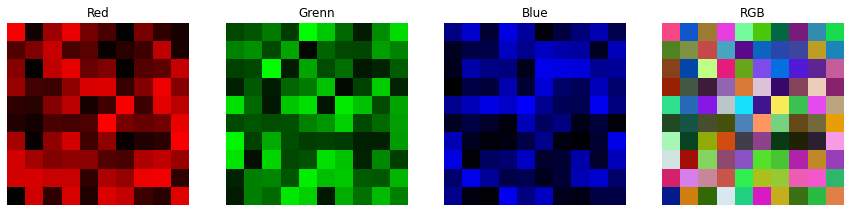

In [25]:
# Create one-color Colormaps
no_color = [[0, 0, 0], [1, 0, 0]]
color = [[0, 0, 0], [1, 1, 1]]
red_cm = LinearSegmentedColormap('red_cm', {'red': color, 'green': no_color, 'blue': no_color})
green_cm = LinearSegmentedColormap('red_cm', {'red': no_color, 'green': color, 'blue': no_color})
blue_cm = LinearSegmentedColormap('red_cm', {'red': no_color, 'green': no_color, 'blue': color})

# Image dimension in pixels
M, N = 10, 10
# Random colors to be diplayed
C = [ np.random.randint(255,size=(M,N)) for i in range(3) ]
# Plot each channel and the result
f, ax = plt.subplots(1,4,figsize=(15,5))
for i in range(3):
    ax[i].imshow(C[i], cmap=[red_cm,green_cm,blue_cm][i], interpolation='none', vmin=0, vmax=255)
    ax[i].axis('off')
    ax[i].set_title(["Red","Grenn", "Blue"][i])
ax[3].imshow([[[C[i][m][n] for i in range(3)] for n in range(N)] for m in range(M)], interpolation='none')
ax[3].axis('off')
ax[3].set_title("RGB")
plt.show()